In [1]:
import glob,os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-colorblind')
import seaborn as sns

In [2]:
files = glob.glob('/oak/stanford/groups/mrivas/projects/degas-risk/scorefiles/results/*_center_*201908*.tsv')
print('\n'.join(map(os.path.basename,files)))

all_z_center_p1e-06_20190805_100PCs.pearsonr.tsv
all_beta_center_p1e-06_20190805_500PCs.pearsonr.tsv
all_z_center_p00001_20190805_500PCs.pearsonr.tsv
all_beta_center_p00001_20190805_100PCs.pearsonr.tsv
all_beta_center_p001_20190805_500PCs.pearsonr.tsv
all_z_center_p0001_20190805_100PCs.pearsonr.tsv
all_beta_center_p00001_20190805_500PCs.pearsonr.tsv
all_beta_center_p1e-06_20190805_100PCs.pearsonr.tsv
all_z_center_p0001_20190805_500PCs.pearsonr.tsv
all_beta_center_p0001_20190805_500PCs.pearsonr.tsv
all_beta_center_p1e-05_20190805_300PCs.pearsonr.tsv
all_beta_center_p00001_20190805_300PCs.pearsonr.tsv
all_z_center_p1e-06_20190805_500PCs.pearsonr.tsv
all_z_center_p1e-05_20190805_100PCs.pearsonr.tsv
all_z_center_p00001_20190805_300PCs.pearsonr.tsv
all_z_center_p00001_20190805_100PCs.pearsonr.tsv
all_beta_center_p1e-05_20190805_100PCs.pearsonr.tsv
all_beta_center_p001_20190805_100PCs.pearsonr.tsv
all_z_center_p001_20190805_100PCs.pearsonr.tsv
all_beta_center_p1e-05_20190805_500PCs.pearsonr.

In [3]:
kind='RAW'
datas = dict([(os.path.basename(f)[4:-13].replace('_20190805','').replace('_center','').replace('Cs','C'),
               pd.read_table(f, index_col=0, usecols=['PHE','TRAIN_'+kind,'TEST_'+kind])) for f in files])

In [4]:
train=pd.DataFrame([datas[ds]['TRAIN_'+kind] for ds in datas], 
                    index=[ds for ds in datas]).T
train.head()

,beta_p0001_100PC,beta_p1e-06_500PC,beta_p001_500PC,z_p00001_100PC,z_p00001_500PC,z_p1e-05_500PC,beta_p0001_300PC,z_p1e-06_300PC,z_p001_100PC,z_p1e-05_300PC,...,beta_p00001_300PC,beta_p001_100PC,beta_p1e-05_100PC,beta_p1e-05_300PC,beta_p1e-06_300PC,z_p0001_300PC,z_p001_500PC,z_p1e-05_100PC,z_p00001_300PC,beta_p001_300PC
BIN10030500,0.023316,0.005197,0.253009,-0.011037,-0.014056,-0.010796,0.025771,0.001497,0.022874,-0.010811,...,0.013690,0.039315,-0.010475,0.001564,0.007442,0.009302,0.124547,-0.010983,-0.013990,0.243558
BIN10030510,0.024693,-0.003518,0.271996,-0.007052,-0.008851,-0.007614,0.030501,-0.003966,0.022434,-0.006410,...,0.013410,0.041029,-0.002802,0.010774,0.001719,0.004697,0.113082,-0.010582,-0.008383,0.262069
BIN10030800,0.008005,0.027632,0.047820,0.004578,0.029929,0.011477,0.022790,0.015252,0.025533,0.010779,...,0.019554,0.025110,0.003672,0.014053,0.013806,0.022953,0.036083,-0.000399,0.017570,0.039867
BIN10030820,0.039698,0.047428,0.062407,0.037943,0.039282,0.038193,0.041710,0.038619,0.036096,0.037576,...,0.041435,0.040984,0.037944,0.041389,0.042293,0.037772,0.036233,0.036902,0.038669,0.042846
BIN1020483,0.000979,NaN,0.227436,-0.002636,-0.000437,0.001701,0.001258,NaN,0.007646,0.002861,...,-0.006723,0.107962,0.001089,-0.001959,NaN,0.001453,0.028925,0.001323,0.000405,0.095356


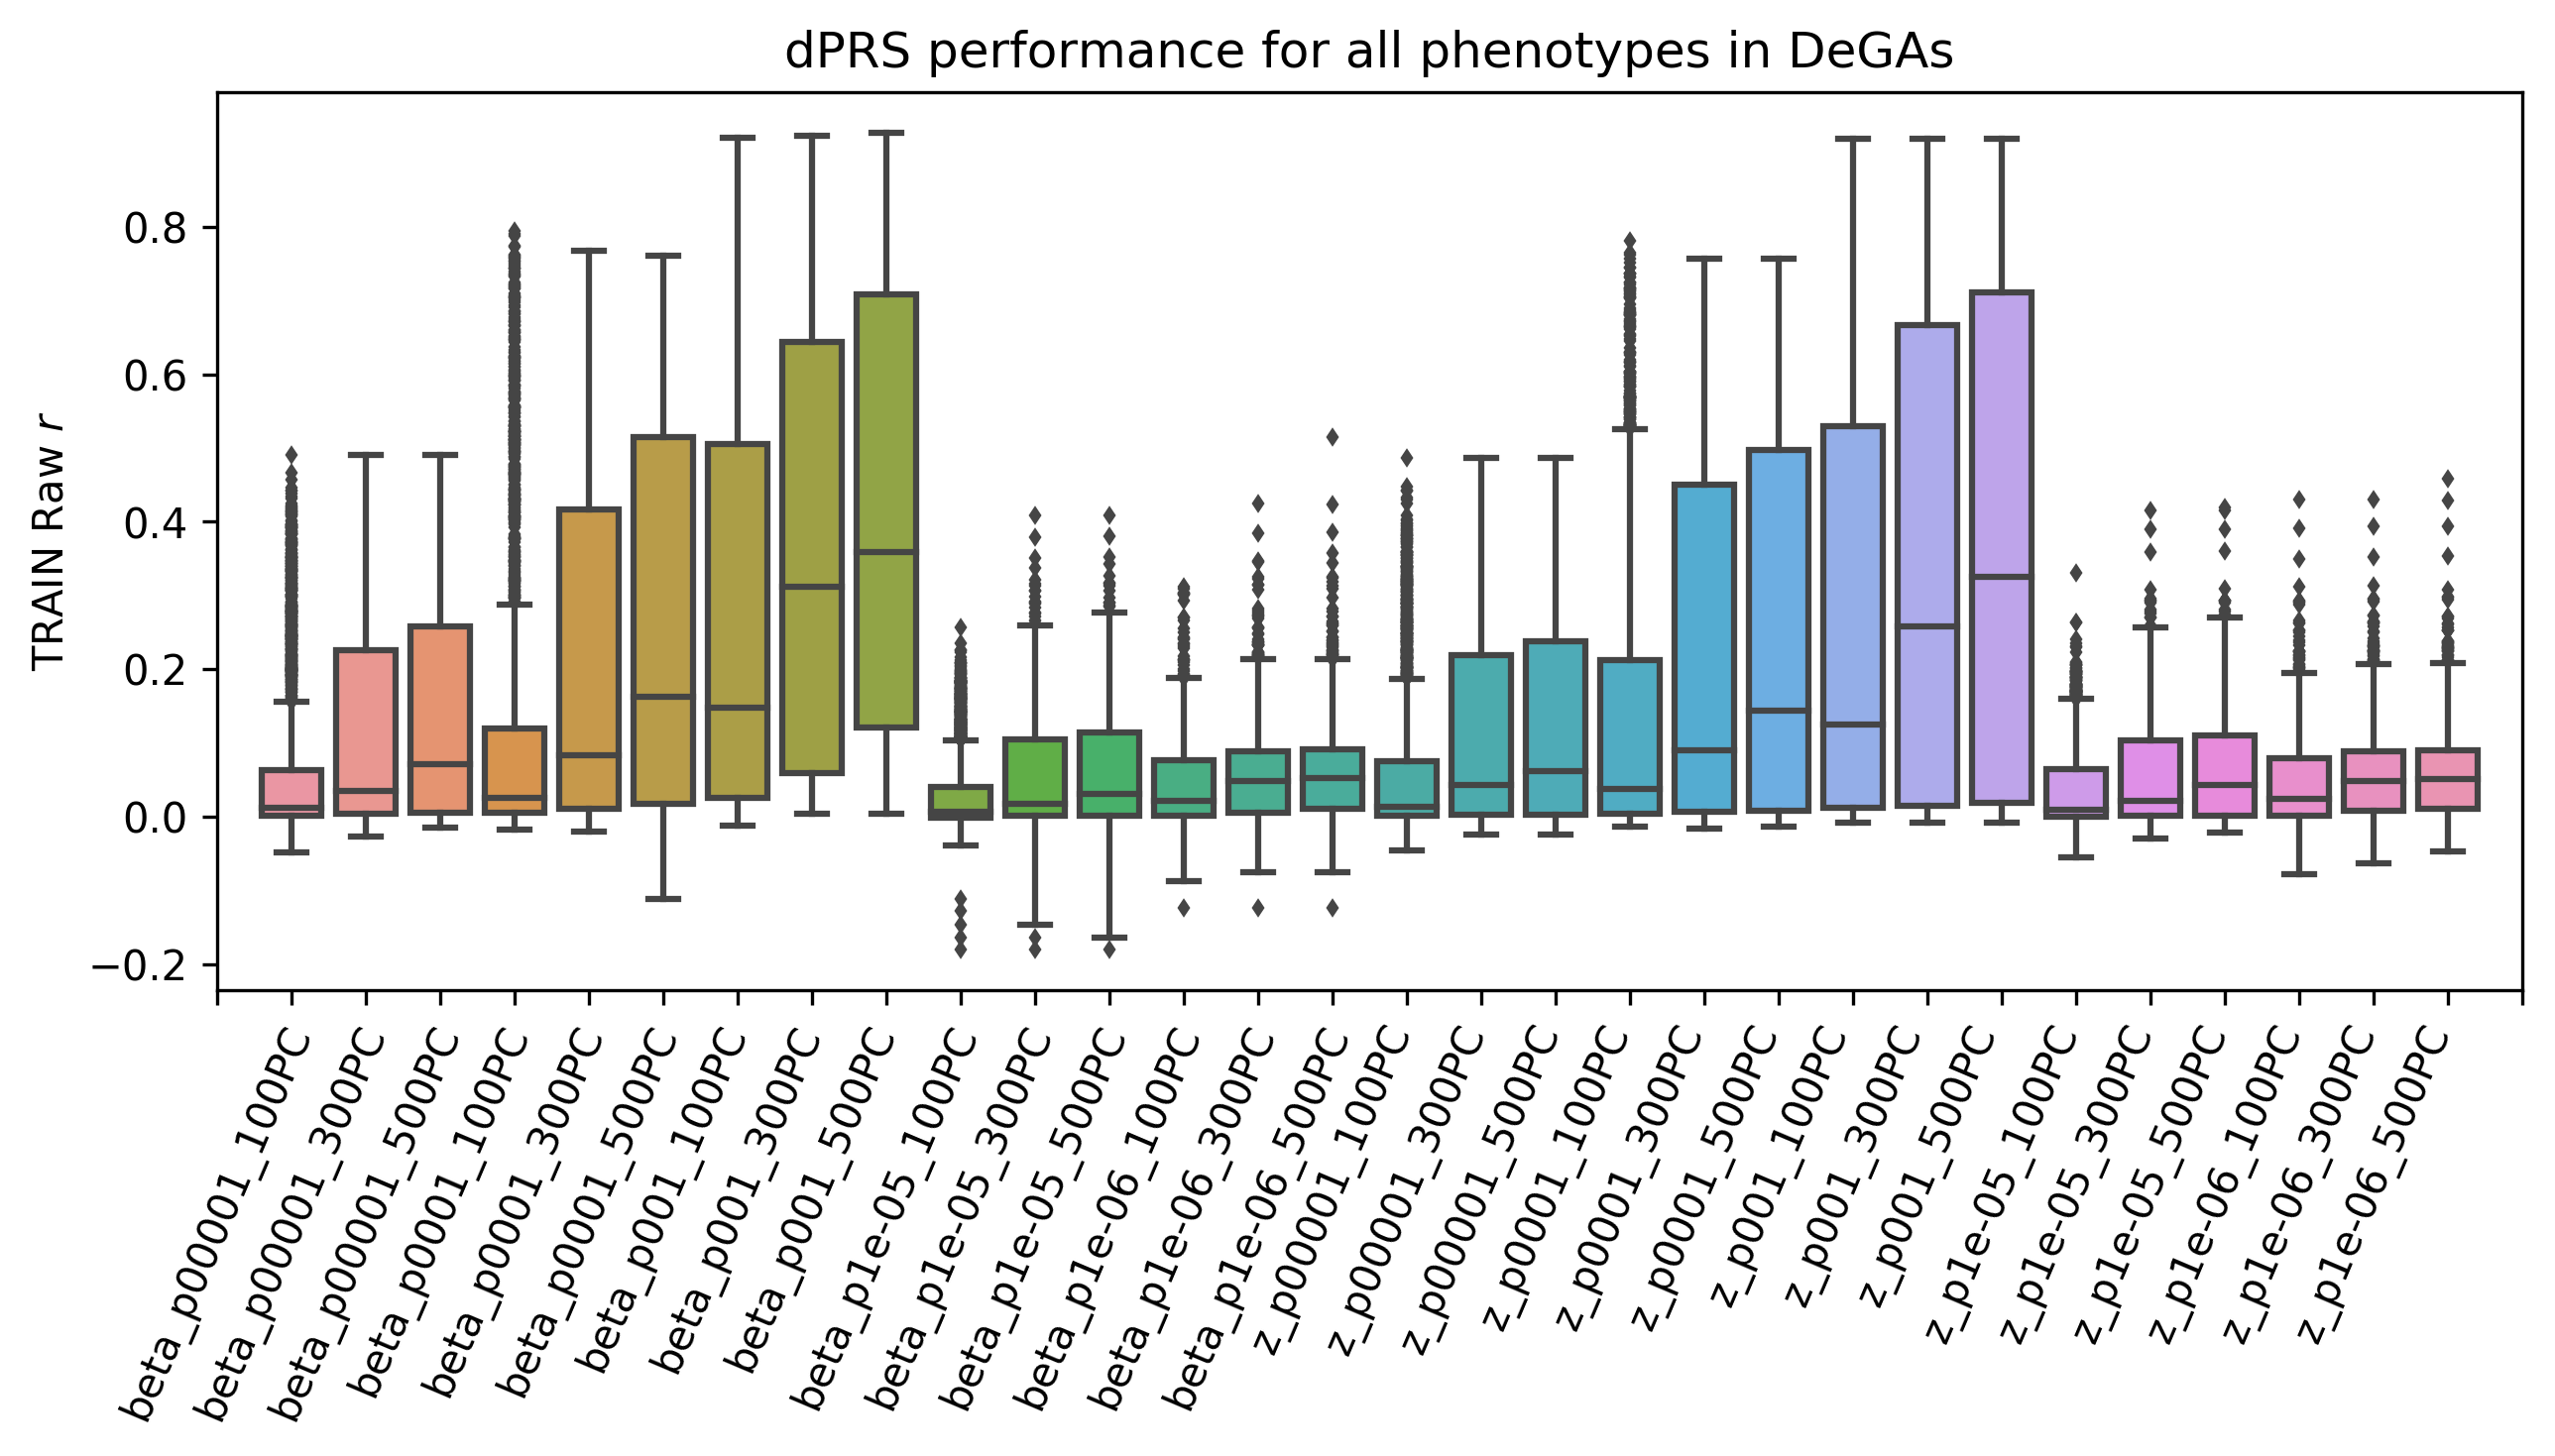

In [5]:
plt.figure(figsize=(10,4),dpi=300)
sns.boxplot(x='dataset',y='rsq',
            data=train.melt(var_name='dataset',value_name='rsq').sort_values('dataset'),
            fliersize=2)
plt.xticks(list(range(-1,len(files)+1)), rotation=67), plt.xlabel('')
plt.ylabel(' '.join(['TRAIN',kind.lower().capitalize(),'$r$']))
plt.title('dPRS performance for all phenotypes in DeGAs')
plt.show()

In [6]:
test=pd.DataFrame([datas[ds]['TEST_'+kind] for ds in datas], 
                 index=[ds for ds in datas]).T
test.head()

,beta_p0001_100PC,beta_p1e-06_500PC,beta_p001_500PC,z_p00001_100PC,z_p00001_500PC,z_p1e-05_500PC,beta_p0001_300PC,z_p1e-06_300PC,z_p001_100PC,z_p1e-05_300PC,...,beta_p00001_300PC,beta_p001_100PC,beta_p1e-05_100PC,beta_p1e-05_300PC,beta_p1e-06_300PC,z_p0001_300PC,z_p001_500PC,z_p1e-05_100PC,z_p00001_300PC,beta_p001_300PC
BIN10030500,0.015595,0.005218,0.038126,-0.004260,-0.008586,-0.004425,0.018033,0.005449,0.011823,-0.004060,...,0.017697,0.018238,-0.004593,0.006565,0.005443,0.007537,0.017336,-0.005478,-0.009220,0.037341
BIN10030510,0.018623,0.003120,0.033555,0.000088,-0.002398,-0.001654,0.024219,0.003511,0.016769,-0.001587,...,0.018421,0.018461,-0.006724,0.011546,0.006179,0.018396,0.019753,-0.012338,-0.004012,0.032447
BIN10030800,0.003815,0.029037,0.014012,0.004911,0.029726,0.013522,0.019097,0.016593,0.016153,0.013537,...,0.021392,0.003998,0.003338,0.015435,0.005796,0.019921,0.029902,-0.000274,0.018747,0.007368
BIN10030820,0.042881,0.047127,0.046439,0.040388,0.041524,0.038794,0.044051,0.038346,0.040069,0.038689,...,0.043818,0.042656,0.041066,0.043406,0.044088,0.041121,0.040236,0.038844,0.041163,0.043260
BIN1020483,0.000966,NaN,0.008198,-0.001085,-0.004874,-0.005376,-0.003650,NaN,-0.006092,-0.005738,...,0.002194,0.016328,0.000312,0.003744,NaN,0.002124,-0.002501,0.002089,-0.002832,0.018565


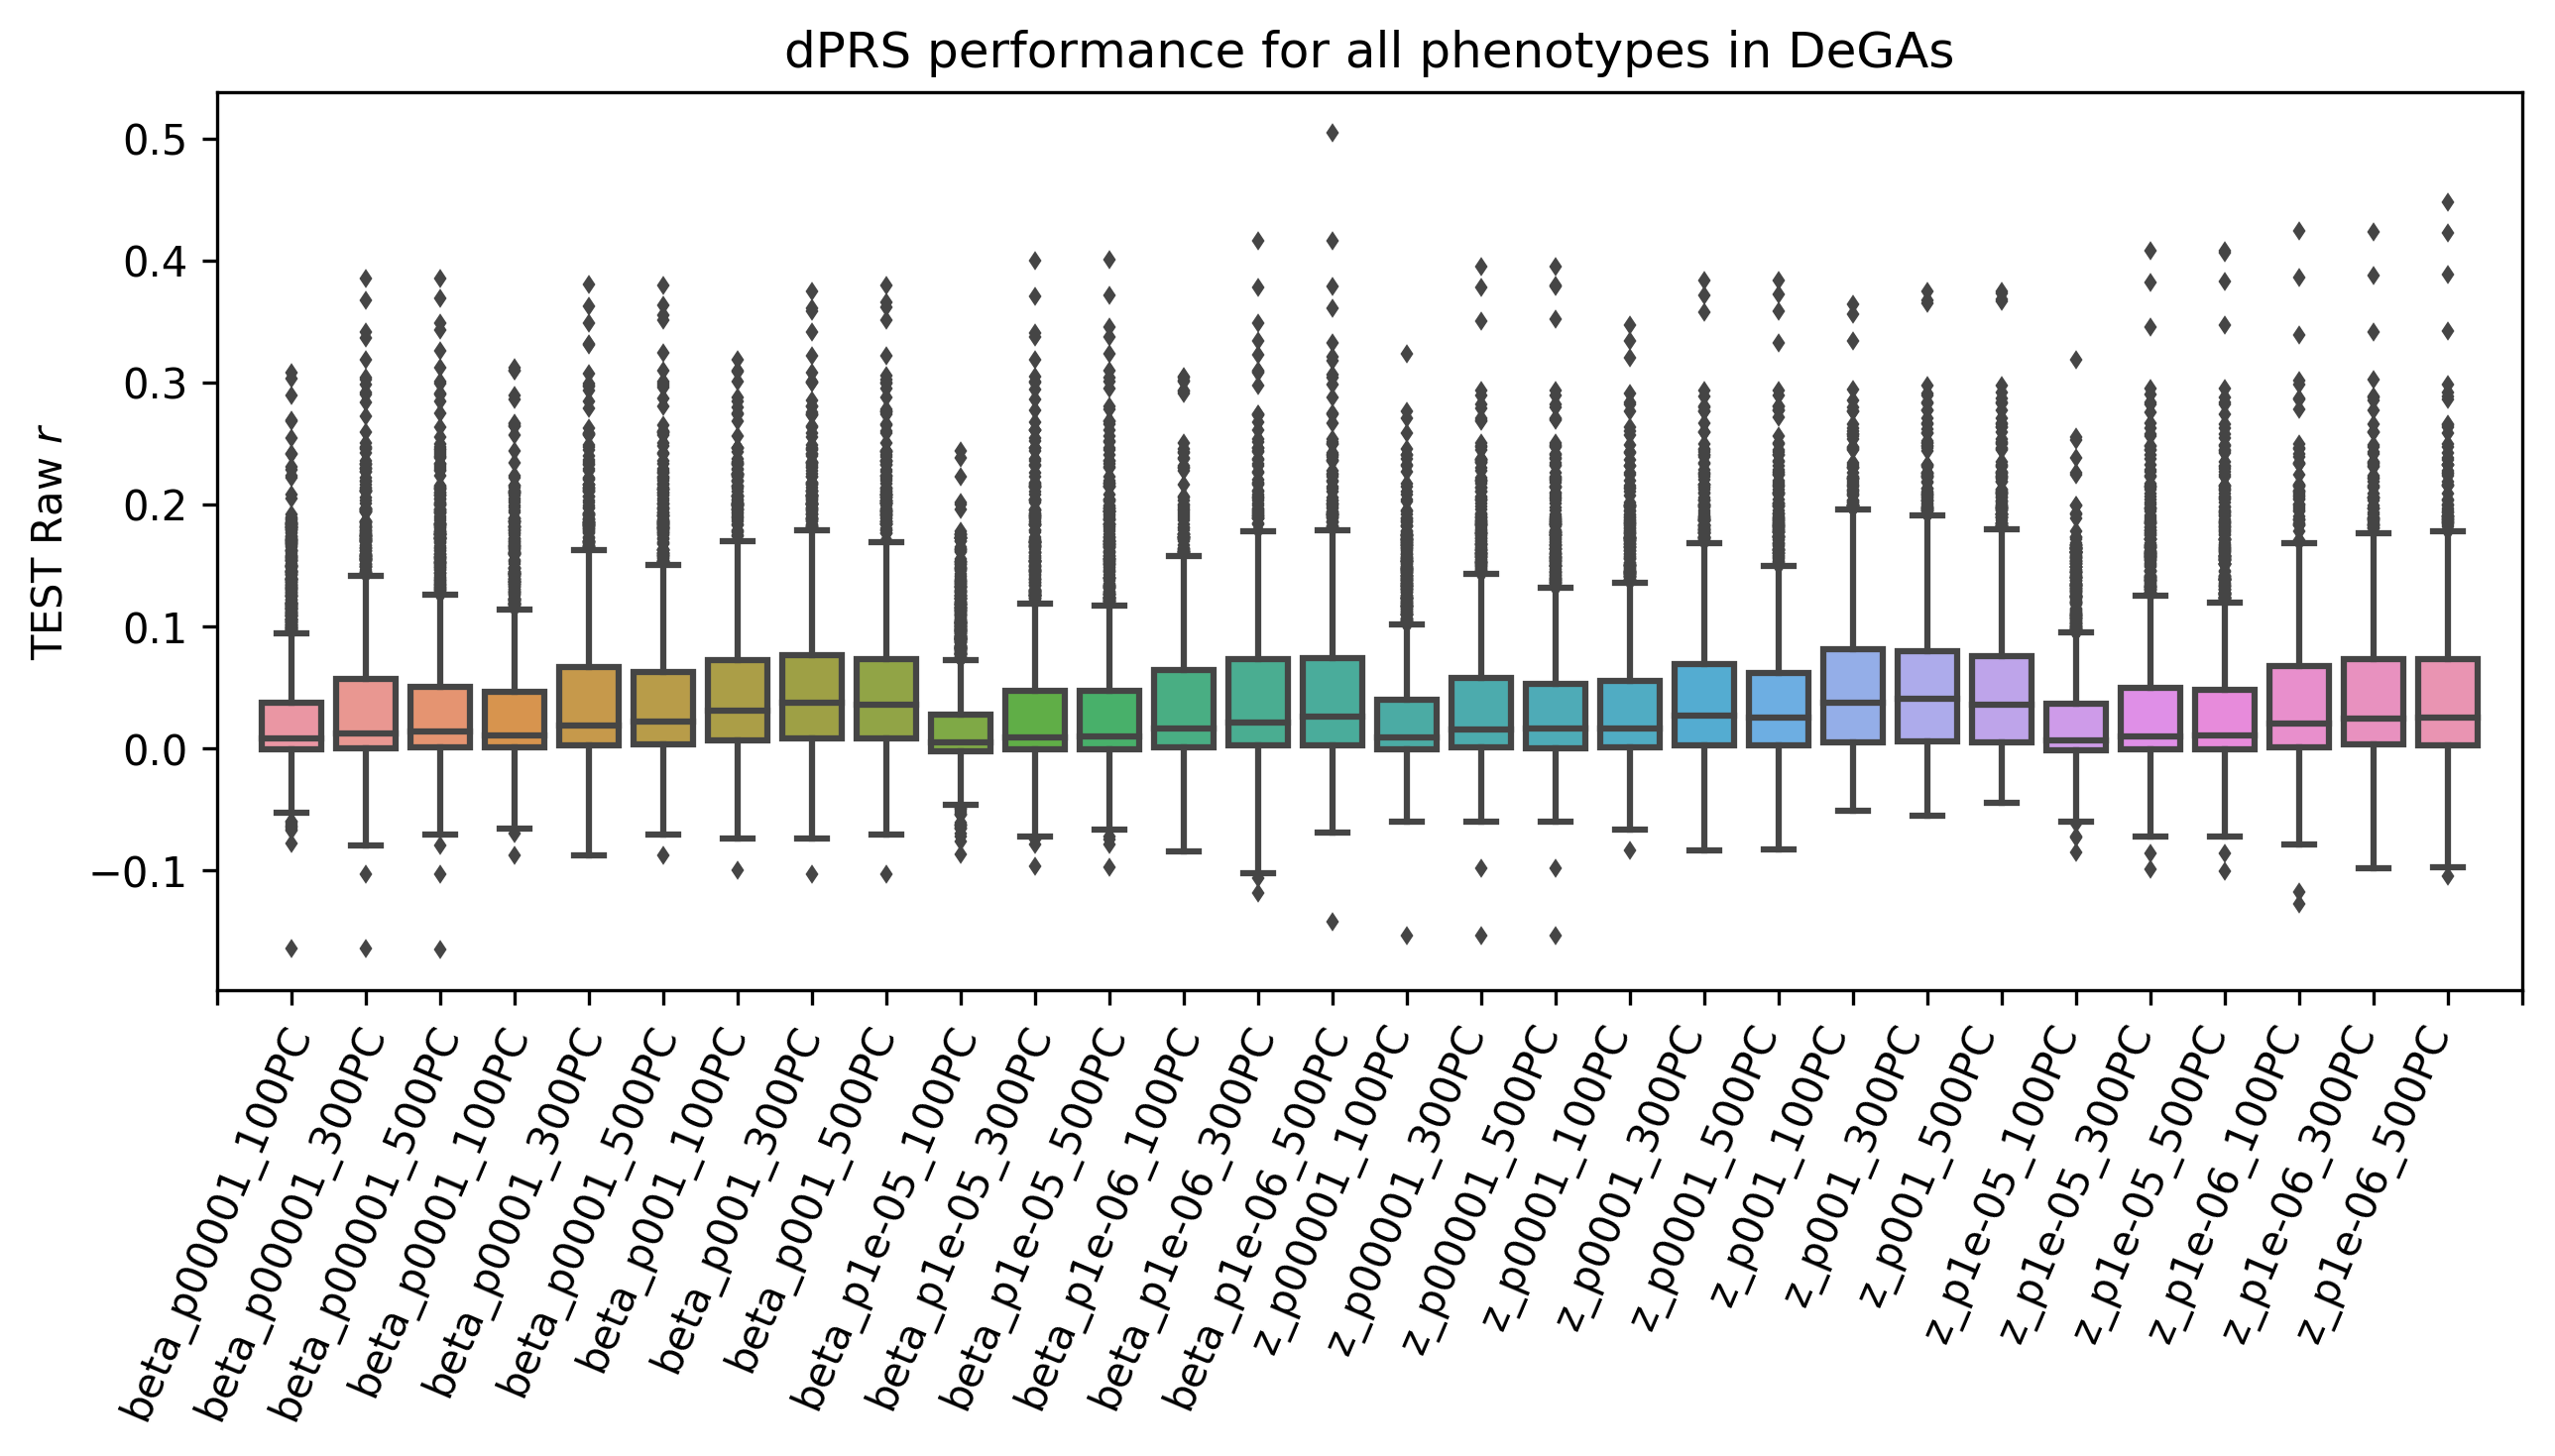

In [15]:
plt.figure(figsize=(10,4),dpi=300)
sns.boxplot(x='dataset',y='rsq',
            data=test.melt(var_name='dataset',value_name='rsq').sort_values('dataset'),
            fliersize=2)
           #showfliers=0)
plt.xticks(list(range(-1,len(files)+1)), rotation=67), plt.xlabel('')
plt.ylabel(' '.join(['TEST',kind.lower().capitalize(),'$r$']))
plt.title('dPRS performance for all phenotypes in DeGAs')
plt.show()

In [8]:
datas['z_p001_100PC'].sort_values('TRAIN_'+kind).dropna()[::-1].head()

,TRAIN_RAW,TEST_RAW
PHE,,
INI23278,0.918715,0.050230
INI23247,0.915024,0.050741
INI23286,0.905335,0.046514
INI23298,0.898131,0.046129
INI23293,0.897652,0.077296


In [9]:
datas['z_p001_100PC'].sort_values('TEST_'+kind).dropna()[::-1].head()

,TRAIN_RAW,TEST_RAW
PHE,,
INI10030840,0.414844,0.364591
INI20030660,0.415984,0.355855
INI30100,0.391659,0.333975
INI20030760,0.389951,0.294088
QT_FC1001717,0.324166,0.285078


In [10]:
pd.DataFrame([datas[d].loc['INI50',:] for d in datas], index=[d for d in datas]).sort_values('TEST_'+kind)[::-1]

,TRAIN_RAW,TEST_RAW
beta_p001_100PC,0.350121,0.274938
beta_p001_300PC,0.349567,0.274366
beta_p001_500PC,0.348823,0.273831
z_p001_300PC,0.325773,0.266324
z_p001_500PC,0.324907,0.265640
beta_p0001_100PC,0.301053,0.256659
z_p001_100PC,0.310269,0.253673
beta_p0001_300PC,0.293211,0.249092
beta_p0001_500PC,0.292362,0.248425
z_p0001_500PC,0.277238,0.241117


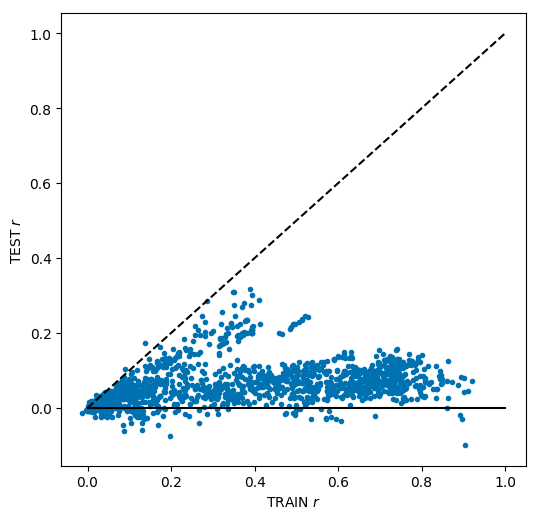

In [11]:
plt.figure(figsize=(6,6), dpi=100)
plt.plot(datas['beta_p001_100PC']['TRAIN_'+kind], 
         datas['beta_p001_100PC']['TEST_'+kind], '.')
plt.plot([0,1],[0,1],'k--')
plt.plot([0,1],[0,0],'k-')
plt.xlabel('TRAIN '+'$r$'), plt.ylabel('TEST '+'$r$')
plt.show()

In [12]:
npzs = glob.glob('/oak/stanford/groups/mrivas/projects/degas-risk/datasets/train/tsvd/*20190805*.npz')
print('\n'.join(map(os.path.basename,npzs)))

all_beta_center_p1e-06_20190805_500PCs.npz
all_z_center_p00001_20190805_500PCs.npz
all_beta_center_p00001_20190805_500PCs.npz
all_beta_center_p001_20190805_500PCs.npz
all_z_center_p1e-06_20190805_500PCs.npz
all_z_center_p0001_20190805_500PCs.npz
all_z_center_p1e-05_20190805_500PCs.npz
all_beta_center_p1e-05_20190805_500PCs.npz
all_beta_center_p0001_20190805_500PCs.npz
all_z_center_p001_20190805_500PCs.npz


In [13]:
x='''
for npz in npzs:
    z=np.load(npz)
    plt.figure(figsize=(12,4), dpi=300)
    plt.plot(np.arange(z['D'].shape[0]), z['variance_explained_ratio'], '.')
    plt.xticks(np.arange(0,z['D'].shape[0],20))
    plt.xlabel('PC'),plt.ylabel('Variance explained')
    # plt.plot([0,z['D'].shape[0]],[1.0/z['V'].shape[0],1.0/z['V'].shape[0]], 'k--')
    plt.legend([os.path.splitext(os.path.basename(npz))[0][4:-16]]) #, 'Isotropic variance'])
    plt.show()'''